# TS8: Estimación espectral. Método de Welch

En esta tarea continuaremos con el capítulo 14 de Holton. DSP Principles and App. y el 8 de Hayes.

Para ello, realizaremos el punto 4 del TP3.

4) Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

Para una señal $x(k)=a_1sen(\omega_1k)+n(k)$ siendo:

$\Omega_1 = \omega_0+ f_r2\pi N$

$\Omega_0=\frac{\pi}{2}$

y las variables aleatorias definidas por

$f_r\sim\mu(-\frac{1}{2},\frac{1}{2})$

$n\sim\eta(0,\sigma^2)$

Evalúe el siguiente estimador de $\Omega_1$

$\Omega_1^W=argmax_f\{\hat{P_W}\}$

basado en el periodograma de Welch evaluado en el TP3. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

$\Omega_1^X=argmax_f\{\hat{P_X}\}$

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del piso de ruido impuesto por n(k).

+ Ayuda: Puede utilizar el módulo de análisis espectral Spectrum donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

### Simular para los siguientes tamaños de señal

R = 200 # realizaciones

N = 1000 # Muestras

### Obtené los valores XX para que cumplas con el enunciado

SNR = np.array([ XX, XX ], dtype=np.float)

### Acá podés generar los gráficos pedidos 

a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.
***
**Respuesta**: El estimador que elegi se basa en el correlograma de Blackman-Tukey, partiendo de la transformada de Fourier
de una secuencia de autocorrelacion:
               
\begin{equation}            
P_{xx}(f) = T \displaystyle\sum_{m=-\infty}^\infty r_{xx}[m]exp^{-j2\pi fmT}
\end{equation}

El metodo de estimacion elegido sustituye la secuencia infinita de autocorrelacion $r_{xx}$ por una secuencia finita $\hat{r_{xx}}$

\begin{equation}            
P_{xx}(f) = T \displaystyle\sum_{m=-L}^L \hat{r_{xx}}[m]exp^{-j2\pi fmT}
\end{equation}

Donde L es un indice de retraso menor al numero de muestras N, ajustando adecuadamente este parametro podemos reducir la varianza en la estimacion. Por otra parte para reducir el sesgo en la estimacion se utiliza una ventana de muestreo estrecha que da origen al correlograma de Blackman-Tukey:

\begin{equation}            
\hat{P}_{BT}(f) = T \displaystyle\sum_{m=-L}^L w[m]\hat{r_{xx}}[m]exp^{-j2\pi fmT}
\end{equation}

***
b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores ij?
***
**Respuesta**: Los indicadores que yo utilize fueron la media y la varianza total del error en el juego de frecuencias a estimar, si la media y varianza tiende a 0 nos indican que el estimador es muy bueno, pero como veremos algunos estimadores son mejores que otros en cierto casos.
***
### Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.

tus_resultados = [['', ''], # <-- acá debería haber numeritos :)
                 ['', ''] # <-- acá debería haber numeritos :)]

df = DataFrame(tus_resultados, columns=['$i_W$', '$i_X$'],index=[  '3 dB','10 dB'])HTML(df.to_html())

### Bonus
+ Implementar el periodograma de Welch


## Resolucion:

 Periodograma  |      SNR      |  Valor Medio  |   Varianza    
------------------------------------------------------------
     Welch     |   3.000000    |   0.000332    |   0.001194    
     Covar     |   3.000000    |   0.003832    |   0.016553    
 Correlograma  |   3.000000    |   0.002832    |   0.022432    
------------------------------------------------------------
     Welch     |   10.000000   |   -0.002168   |   0.000998    
     Covar     |   10.000000   |   -0.002168   |   0.001824    
 Correlograma  |   10.000000   |   0.002832    |   0.002657    


<IPython.core.display.Javascript object>

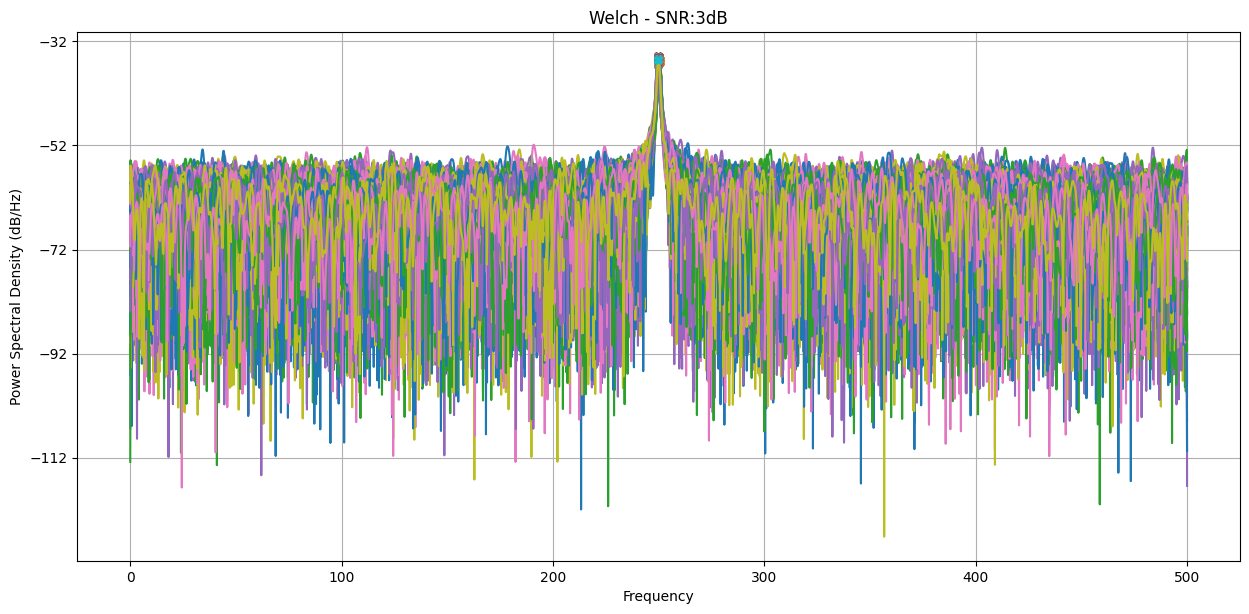

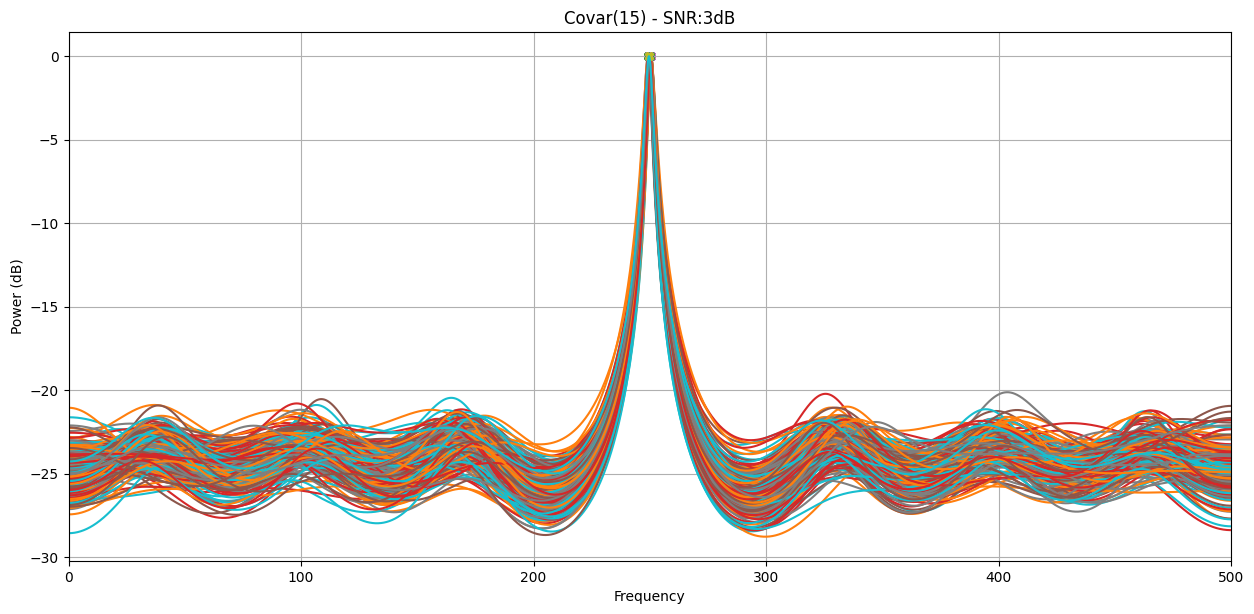

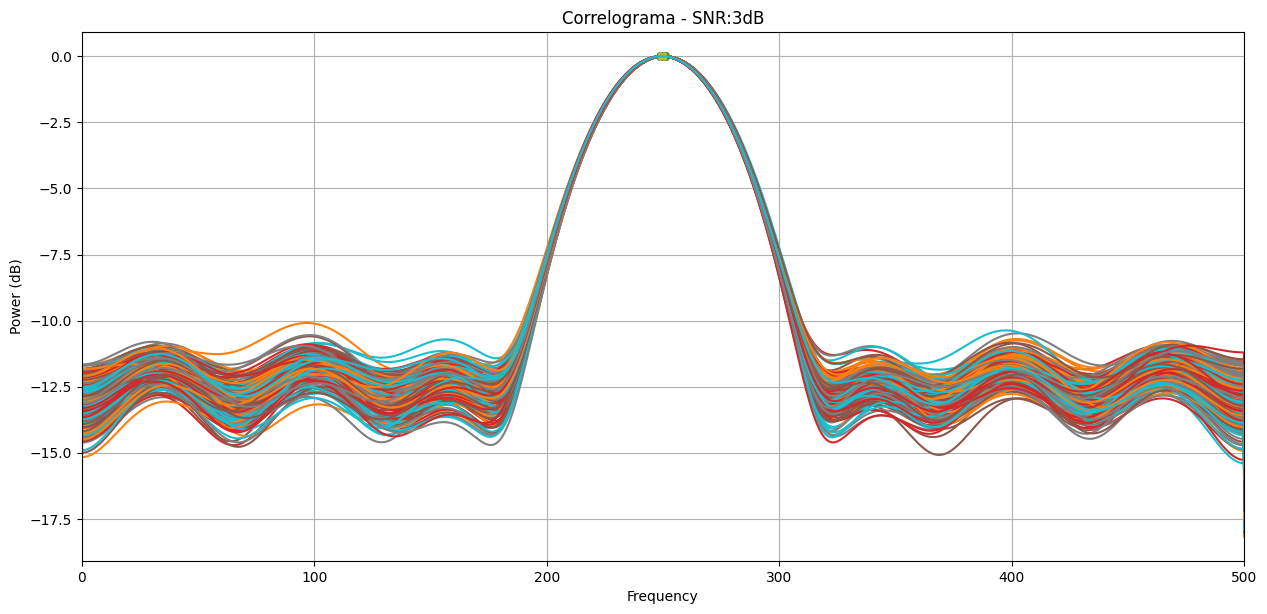

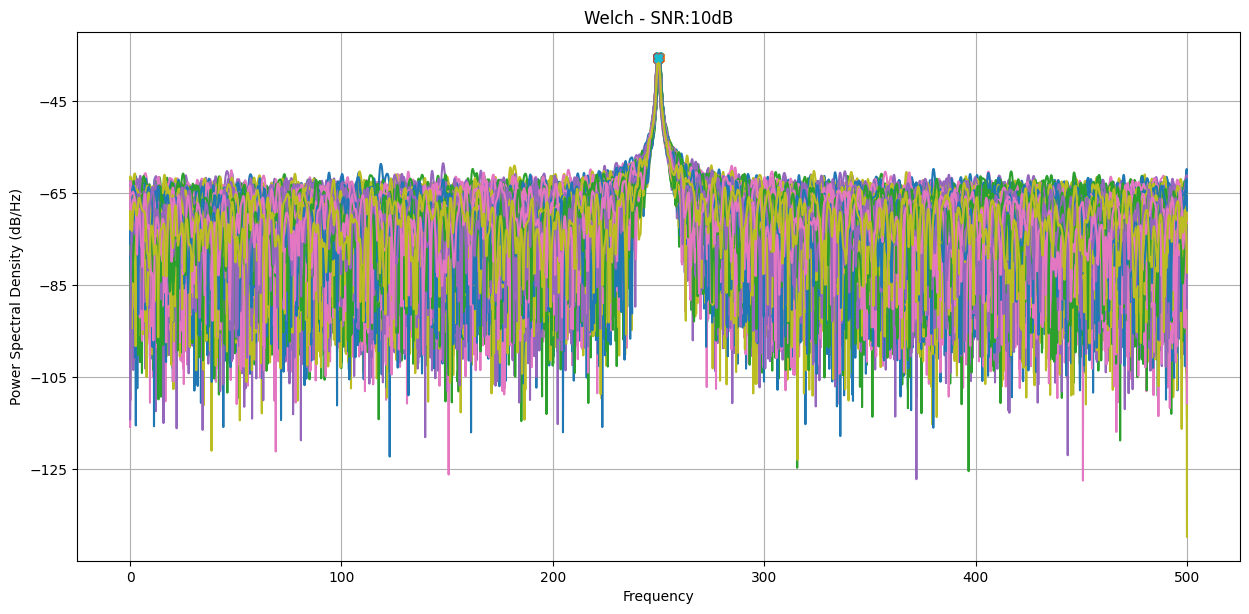

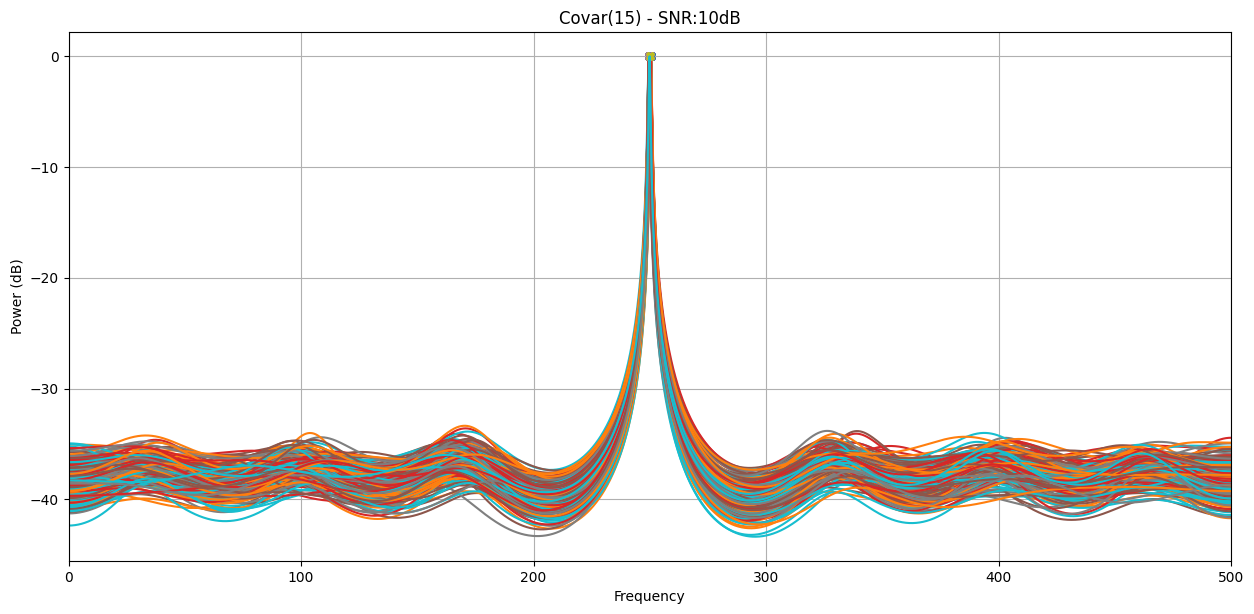

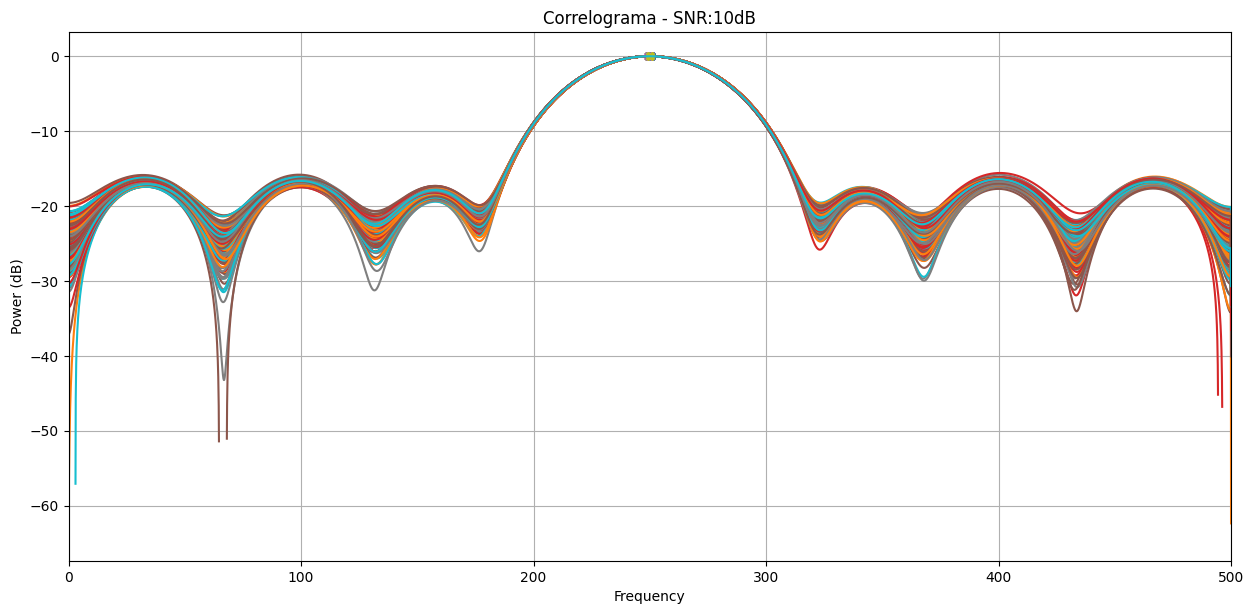

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from spectrum import WelchPeriodogram, pcovar, pcorrelogram
from IPython.display import display, Javascript, HTML
from pandas import DataFrame

def load_ipython_extension():
    disable_js = """
    IPython.OutputArea.prototype._should_scroll = function(lines) {
        return false;
    }
    """

    display(Javascript(disable_js))

pi = np.pi
fs = 1000
padding = 10
N = 1000
repeat = 200

t = np.linspace(0, (N-1)/fs, N)
f = np.linspace(0, (N-1)*(fs/N), N)

fr = np.random.uniform(-1/2, 1/2, repeat)
omega0 = pi/2
omega1 = (omega0 + fr*((2*pi)/N))*(fs/(2*pi))

pot = np.array([3,10])

a1 = 1
noise_p = a1/(10**(pot/10))
SNR = 10 * np.log10(a1/noise_p)

#%%
noise = np.random.normal(0, np.sqrt(noise_p[0]), (N, repeat))
senal = (np.sqrt(a1*2))*np.sin(2*pi*t.reshape(N, 1)*omega1.reshape(1, repeat))
x1 =  senal + noise

Pgram = (1/N)*np.abs(np.fft.fft(x1, n=N*padding, axis = 0))**2

plt.close('all')
plt.figure(1, figsize=(15, 7), dpi=100)
pk_ar1 = np.empty(repeat)
for i in range(0,repeat):
    pp, r = WelchPeriodogram(x1[:, i], NFFT=padding*N, sampling=fs)#, lag=3*N//4
    pp_welch = pp[0]
    f_welch = pp[1]
    peaks = np.argmax(pp_welch, axis = 0)
    peaks_n = pk_ar1[i] = peaks/padding
    plt.plot(peaks_n, 10*np.log10(pp_welch[peaks]), "X")
    plt.title('Welch - SNR:3dB')

pk_ar2 = np.empty(repeat)
plt.figure(2, figsize=(15, 7), dpi=100)
for i in range(0,repeat):
    p = pcovar(x1[:,i], order=15, NFFT=padding*N, sampling=fs)
    d = p.psd
    peaks = np.argmax(d, axis = 0)
    peaks_n = pk_ar2[i] = peaks/padding
    plt.plot(peaks_n, 10*np.log10(d[peaks]/d[peaks].max()), "X")
    p(); p.plot(norm=True)
    plt.title('Covar(15) - SNR:3dB')

pk_ar3 = np.empty(repeat)
plt.figure(3, figsize=(15, 7), dpi=100)
old = np.seterr(invalid='ignore') # pcorrelogram preseenta un warning debido a log10, con esto no nos imprime el warning

for i in range(0,repeat):
    p = pcorrelogram(x1[:,i], lag=15, NFFT=padding*N, sampling=fs)
    d = p.psd
    peaks = np.argmax(d, axis = 0)
    peaks_n = pk_ar3[i] = peaks/padding
    plt.plot(peaks_n, 10*np.log10(d[peaks]/d[peaks].max()), "X")
    p(); p.plot(norm=True)
    plt.title('Correlograma - SNR:3dB')
    
np.seterr(**old) #volvemos a activar los warnings por valor invalidos

errorw3 = pk_ar1 - omega1
errorc3 = pk_ar2 - omega1
errorb3 = pk_ar3 - omega1

#%%
headers = ["Periodograma", "SNR", "Valor Medio", "Varianza"]
per = ["Welch", "Covar", "Correlograma"]
print(f'{headers[0]:^15s}|{headers[1]:^15s}|{headers[2]:^15s}|{headers[3]:^15s}')
print('------------------------------------------------------------')
print(f'{per[0]:^15s}|{SNR[0]:^15f}|{np.mean(errorw3):^15f}|{np.var(errorw3):^15f}')
print(f'{per[1]:^15s}|{SNR[0]:^15f}|{np.mean(errorc3):^15f}|{np.var(errorc3):^15f}')
print(f'{per[2]:^15s}|{SNR[0]:^15f}|{np.mean(errorb3):^15f}|{np.var(errorb3):^15f}')

#%%
noise = np.random.normal(0, np.sqrt(noise_p[1]), (N, repeat))
senal = (np.sqrt(a1*2))*np.sin(2*pi*t.reshape(N, 1)*omega1.reshape(1, repeat))
x1 =  senal + noise

plt.figure(4, figsize=(15, 7), dpi=100)
pk_ar1 = np.empty(repeat)
for i in range(0,repeat):
    pp, r = WelchPeriodogram(x1[:, i], NFFT=padding*N, sampling=fs)
    pp_welch = pp[0]
    f_welch = pp[1]
    peaks = np.argmax(pp_welch, axis = 0)
    peaks_n = pk_ar1[i] = peaks/padding
    plt.plot(peaks_n, 10*np.log10(pp_welch[peaks]), "X")
    plt.title('Welch - SNR:10dB')

pk_ar2 = np.empty(repeat)
plt.figure(5, figsize=(15, 7), dpi=100)
for i in range(0,repeat):
    p = pcovar(x1[:,i], order=15, NFFT=padding*N, sampling=fs)
    d = p.psd
    peaks = np.argmax(d, axis = 0)
    peaks_n = pk_ar2[i] = peaks/padding
    plt.plot(peaks_n, 10*np.log10(d[peaks]/d[peaks].max()), "X")
    p(); p.plot(norm=True) 
    plt.title('Covar(15) - SNR:10dB')

pk_ar3 = np.empty(repeat)
plt.figure(6, figsize=(15, 7), dpi=100)
old = np.seterr(invalid='ignore') # pcorrelogram preseenta un warning debido a log10, con esto no nos imprime el warning

for i in range(0,repeat):
    p = pcorrelogram(x1[:,i], lag=15, NFFT=padding*N, sampling=fs)
    d = p.psd
    peaks = np.argmax(d, axis = 0)
    peaks_n = pk_ar3[i] = peaks/padding
    plt.plot(peaks_n, 10*np.log10(d[peaks]/d[peaks].max()), "X")
    p(); p.plot(norm=True)
    plt.title('Correlograma - SNR:10dB')
    
np.seterr(**old) #volvemos a activar los warnings por valor invalidos

errorw10 = pk_ar1 - omega1
errorc10 = pk_ar2 - omega1
errorb10 = pk_ar3 - omega1
print('------------------------------------------------------------')
print(f'{per[0]:^15s}|{SNR[1]:^15f}|{np.mean(errorw10):^15f}|{np.var(errorw10):^15f}')
print(f'{per[1]:^15s}|{SNR[1]:^15f}|{np.mean(errorc10):^15f}|{np.var(errorc10):^15f}')
print(f'{per[2]:^15s}|{SNR[1]:^15f}|{np.mean(errorb10):^15f}|{np.var(errorb10):^15f}')

load_ipython_extension()

In [34]:
tus_resultados = [ 
                   [f'{np.round(np.mean(errorw3),5)}, {np.round(np.var(errorw3),5)}', f'{np.round(np.mean(errorb3),5)}, {np.round(np.var(errorb3),5)}'],
                   [f'{np.round(np.mean(errorw10),5)}, {np.round(np.var(errorw10),5)}', f'{np.round(np.mean(errorb10),5)}, {np.round(np.var(errorb10),5)}']
                 ]
df = DataFrame(tus_resultados, columns=['$i_W$(media, varianza)', '$i_X$(media, varianza)'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())

,"$i_W$(media, varianza)","$i_X$(media, varianza)"
3 dB,"0.00033, 0.00119","0.00283, 0.02243"
10 dB,"-0.00217, 0.001","0.00283, 0.00266"
